# Sensitivity analysis - Retirement  Model

Sensitivity analysis is the process which determines how different values of one or more independent variables affect a particular dependent variable under a given set of assumptions. 

## Import required libraries

In [68]:
from dataclasses import dataclass
from sensitivity import SensitivityAnalyzer

## Data input

In this section, we define our `RetirementInput` class which stores the data for our analysis. This includes the following parameters:
* `salary` which is the initial starting salary.
* `promotions_every_n_years` is the number of years per promotion.
* `cost_of_living_raise` is the increase in wages due to inflation.
* `promo_raise` is the increase in wages for each promotion.
* `savings_rate` is the proportion of income that is saved.
* `interest_rate` is the interest rate paid on the savings.
* `desired_fund` is the desired amount of savings for retirement.

It is worth noting we use the `@dataclass` decorator for our class, it provides some built-in functionality that makes it easier to define data-oriented classes, such as automatically generating default `__init__()` and `__repr__()` methods. Using `@dataclass` helps to write more concise and readable code.

In [69]:
@dataclass
class RetirementInput:
    salary: int = 60000
    promotions_every_n_years: int = 5
    cost_of_living_raise: float = 0.02
    promo_raise: float = 0.15
    savings_rate: float = 0.25
    interest_rate: float = 0.05
    desired_fund: int = 1500000

In [70]:
Retirement_Data = RetirementInput()
Retirement_Data

RetirementInput(salary=60000, promotions_every_n_years=5, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.25, interest_rate=0.05, desired_fund=1500000)

## Functions

The first function `salary_in_year` works by assuming that the salary rises only occur for two reasons, promotions and cost of living increases. Therefore, our function works by first calculating the number of promotions each year and then calculating the salary after a given number of years. 

In [71]:
def salary_in_year(data: RetirementInput, year):
    # Calculates number of promotions
    num_promos = int(year / data.promotions_every_n_years)
    
    # Salary in that year
    salary_in_year = data.salary * (1 + data.cost_of_living_raise) ** year * (1 + data.promo_raise) ** num_promos
    return salary_in_year

In [72]:
for i in range(6):
    year = i + 1
    salary = salary_in_year(Retirement_Data, year)
    print(f'The salary at year {year} is ${salary:,.0f}.')

The salary at year 1 is $61,200.
The salary at year 2 is $62,424.
The salary at year 3 is $63,672.
The salary at year 4 is $64,946.
The salary at year 5 is $76,182.
The salary at year 6 is $77,705.


The second function `saved_income` is a basic function that calculates the saved income by calculating the salary and then calculating the saved income given both the `savings_rate` and `salary`.

In [73]:
def saved_income(data: RetirementInput, year):
    salary = salary_in_year(data, year)
    savings = data.savings_rate * salary
    return savings

In [74]:
for i in range(6):
    year = i + 1
    savings = saved_income(Retirement_Data, year)
    print(f'The saved income at year {year} is ${savings:,.0f}.')

The saved income at year 1 is $15,300.
The saved income at year 2 is $15,606.
The saved income at year 3 is $15,918.
The saved income at year 4 is $16,236.
The saved income at year 5 is $19,045.
The saved income at year 6 is $19,426.


The final function `years_to_retirement` calculates the number of years it takes for the individual's wealth to reach the `desired_fund` value, it does this by using a `while` loop and calculating the interest rate on previous savings and adding the saved income each year. When the loop has executed, it then tells us the number of years it will take to retire. 

In [75]:
def years_to_retirement(data: RetirementInput, print_output=False):
    # Starting with no cash saved
    wealth = 0
    
    # Starting year for loop
    year = 0
    
    while wealth < data.desired_fund:
        year += 1
        wealth = wealth * (1 + data.interest_rate) + saved_income(data, year)
        if print_output==True:
            print(f'The wealth at year {year} is ${wealth:,.0f}.')
        
    
    if print_output==True:
        print(f'\nRetirement:\nIt will take {year} years to retire.')
        
    return year
        
    
        

In [76]:
years_to_retirement(Retirement_Data, print_output=True)

The wealth at year 1 is $15,300.
The wealth at year 2 is $31,671.
The wealth at year 3 is $49,173.
The wealth at year 4 is $67,868.
The wealth at year 5 is $90,307.
The wealth at year 6 is $114,248.
The wealth at year 7 is $139,775.
The wealth at year 8 is $166,975.
The wealth at year 9 is $195,939.
The wealth at year 10 is $229,918.
The wealth at year 11 is $266,080.
The wealth at year 12 is $304,542.
The wealth at year 13 is $345,431.
The wealth at year 14 is $388,878.
The wealth at year 15 is $439,025.
The wealth at year 16 is $492,294.
The wealth at year 17 is $548,853.
The wealth at year 18 is $608,878.
The wealth at year 19 is $672,557.
The wealth at year 20 is $745,168.
The wealth at year 21 is $822,190.
The wealth at year 22 is $903,859.
The wealth at year 23 is $990,422.
The wealth at year 24 is $1,082,140.
The wealth at year 25 is $1,185,745.
The wealth at year 26 is $1,295,520.
The wealth at year 27 is $1,411,793.
The wealth at year 28 is $1,534,910.

Retirement:
It will tak

28

In all these functions, you may notice how the `data: RetirementInput` parameter is different to other functions we have covered in projects before. This parameter is a hint that specifies the expected data type of the `data` parameter. `RetirementInput` is our custom class and specifies that our `data` parameter should be an instance of that class.

## Sensitivity analysis

In [89]:
def years_to_retirement_separate_args(**kwargs):
    data = RetirementInput(**kwargs)
    return years_to_retirement(data)

years_to_retirement_separate_args()

28

In [94]:
sensitivity_values = {
    'salary':[i * 10000 for i in range(1, 10)],
    'promotions_every_n_years':[i for i in range(1, 5)],
    'cost_of_living_raise':[i/100 for i in range(1, 10)],
    'promo_raise':[i/20 for i in range(5, 10)],
    'savings_rate':[i/20 for i in range(1, 5)],
    'interest_rate':[i/100 for i in range(1, 10)],
    'desired_fund':[i * 500000 for i in range(1, 5)]
}

labels = {
    'salary':'Starting salary',
    'promotions_every_n_years':'Number of years per promotion',
    'cost_of_living_raise':'Payrise due to inflation',
    'promo_raise':'Promotion raise',
    'savings_rate':'Savings rate',
    'interest_rate':'Interest rate',
    'desired_fund':'Desired fund size'
}

sa = SensitivityAnalyzer(
    sensitivity_values, 
    years_to_retirement_separate_args,
    result_name='Years to Retirement',
    labels=labels
)

100%|██████████| 233280/233280 [13:43<00:00, 283.30it/s]


In the code above, we define the different values of each parameter we want to test in our dictionary (`sensitivity_values`) and use the `SensitivityAnalyzer` class to test these values.

In [95]:
sa.df

,Starting salary,Number of years per promotion,Payrise due to inflation,Promotion raise,Savings rate,Interest rate,Desired fund size,Years to Retirement
0,10000,1,0.01,0.25,0.05,0.01,500000,23
1,10000,1,0.01,0.25,0.05,0.01,1000000,26
2,10000,1,0.01,0.25,0.05,0.01,1500000,28
3,10000,1,0.01,0.25,0.05,0.01,2000000,29
4,10000,1,0.01,0.25,0.05,0.02,500000,23
...,...,...,...,...,...,...,...,...
233275,90000,4,0.09,0.45,0.2,0.08,2000000,16
233276,90000,4,0.09,0.45,0.2,0.09,500000,9
233277,90000,4,0.09,0.45,0.2,0.09,1000000,12
233278,90000,4,0.09,0.45,0.2,0.09,1500000,14


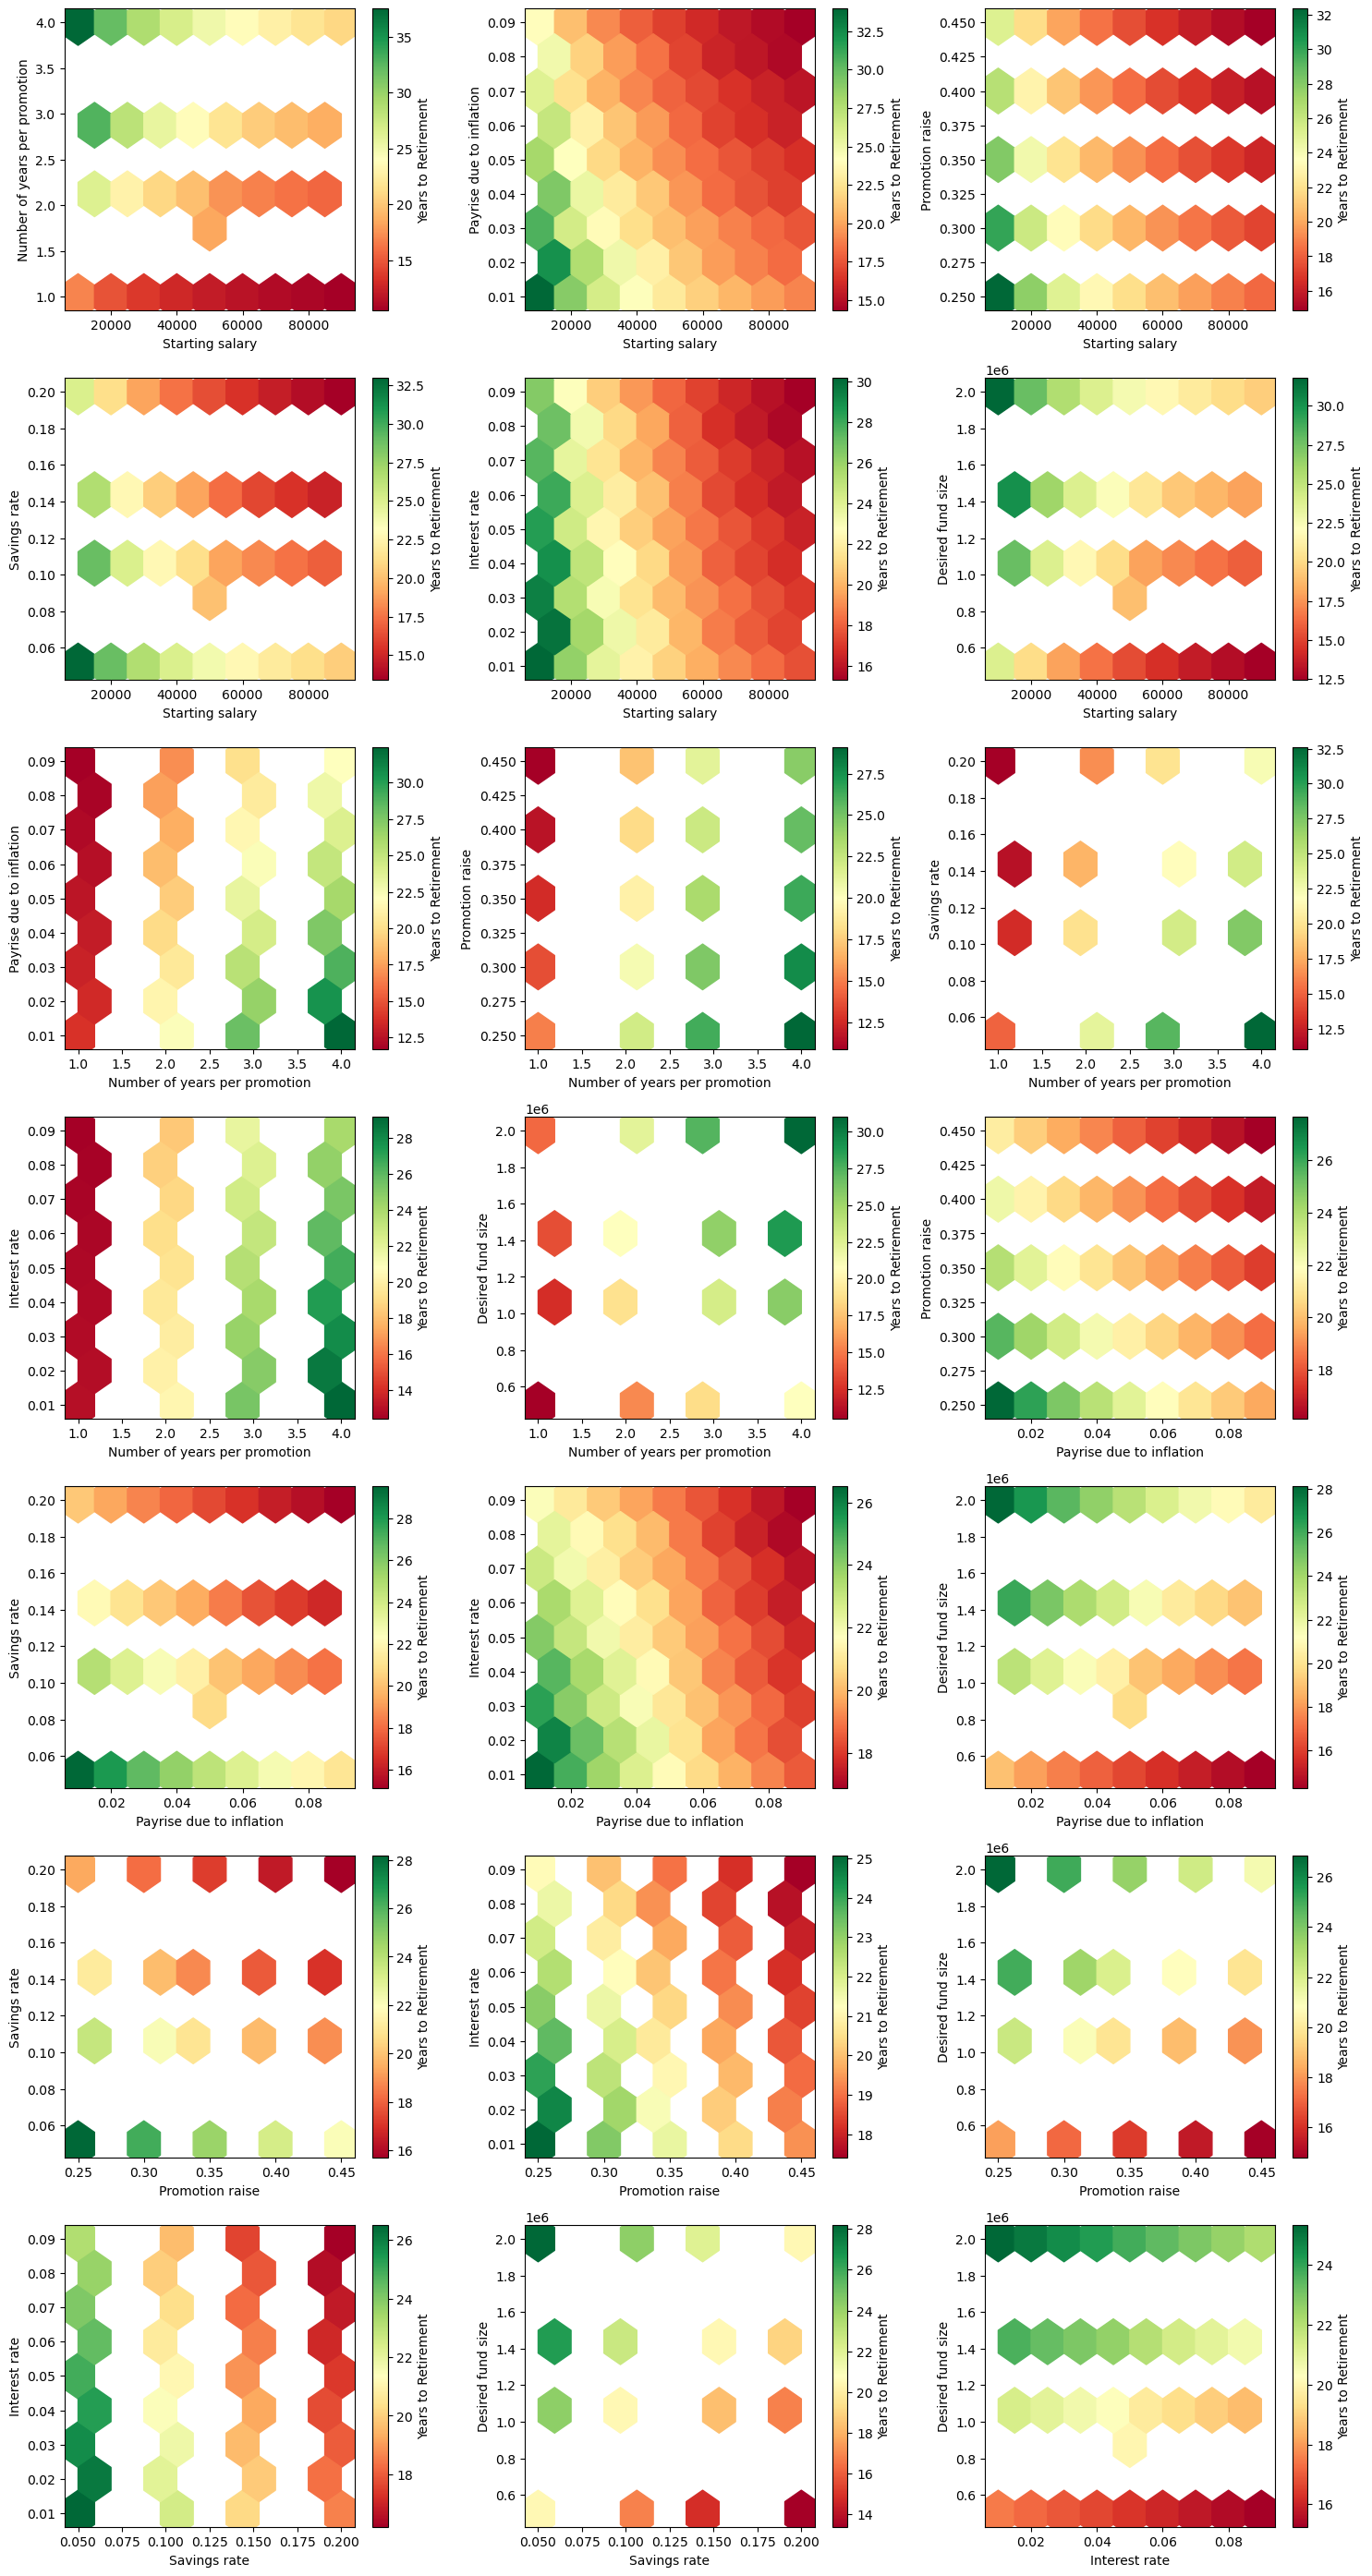

In [97]:
plot = sa.plot()

From our sensitivity analysis, we can see how the different factors impact the number of years to retirement.